# Math Assistant

Back in 1976, I was working as a research aeronautical engineer at the USAF Aerospace Research Laboratory at Wright-Patterson Air Force Base in Dayton Ohio. Besides learning to fly on the same field the Wright Brothers used in their early testing work on Huffman Prairie (now part of WPAFB), I was working on a computer program that would analyze the flow over a simple vehicle flying at hypersonic speeds. This work was part of the emerging field of Computational Fluid Dynamics. We used the fastest computers available at the time, including first generation Cray-1 supercomputers for this work. 

Basically, I had to take the Navier-Stokes Equations on fluid motion and transform them into something the computer could handle, then run test cases to check how the program predicted the flow around the vehicle against wind tunnel tests of the same vehicle.

## Analysis Phase

Working through the derivation of the Navier-Stokes equations as part of developing a numerical scheme for analyzing the flow of air over a vehicle was done by hand back then. It took about 100 pages to get this done thoroughly.

What are the odds that you could do this kind of math work with no mistakes? Dropped terms, wrong signs, and more were all common mistakes. One of my respected co-researchers, Joe, told me once that he did his math development three times and used the solution that came out the same twice as the correct one. 

```warning
But, Joe, the third one was the right one!
```

That was my reply, and we both walked away shaking our heads.

After some time doing this work, I had an idea. I actually wrote a program that automated the math work we were doing, so I could verify my final program code. It worked well enough that I was able to check code produced by other reseaechers. The strange thing about my program was that it was written in the language we all knew back then: Fortran! Hardly a good language for writing a symbolic math program. I actually found a book that described how to write a compiler using Fortran, and used many ideas from that book in my math manipulation program.

While my program was successful, it was limited to exactly one problem, so that project was short-lived. Shortly after completing that code, I ran into the *Macsyma* project at MIT, and switched to that tool to do the same ind of work. I used the fledgling Arpanet (the granddaddy of the Internet) to access a machine at MIT from my office in Dayton, Ohio. Believe it or not, I used a terminal with an acoustic coupler that we connected to a rotary telephone and passed data back and forth at a staggering 110 bits per second! (Don't complain to me about your slow Internet connection!)

## Fast Forward

So here we are some (um) years later, and I am once again working on my early CFD code, this time for fun, and facing the exact same problem. I want to work through the derivation of all the math needed to build by program and recast my original code into modern Fortran. 

Guess what? I still need to manipulate all that math, and my old program is long gone. 

There are modern math tools I could use to do this analysis including a now freely available version of *Macsyma*. However, I decided to build a simple Python tool to do the same math manipulations I did way back when! While considering this side project, I ran across a nice book, *Math for Programmers*{cite}`orland2020` that demonstrated how to do symbolic math using Python, so the development that follows was inspired by that reference.

The assistant I need does not need to know everything about math, just enough to assist my derivation work. If you need more power, you should look into **sympy**.

## Atomic Particles

Before we start building anything, we need to figure out what the most basic objects will be in our math work. Conventionally, we call these objects *atoms*, meaning they are indivisible. (Obviously this term needs updating, since now physicists break atoms down into more fundamental elementary gadgets.)

Obvious atoms are simple numbers. As programmers, we know what they look like: **integers** and **floats** in Python. Numbers never change, meaning they are constants. If we choose to, we can name constants so we do not need to repeat the number, and we have some idea what they number represents. **pi** is an example of a named number. Some numbers, like **pi** have a symbolic representation we see in print: $\pi$ for example. 

We will need a way to create these constants, and a way to fetch the numerical number assigned, and the printable representation as well. For this project, the math will be displayed using $\LaTeX$.

Let's get started by creating a Python class to define constants. Since we will be building classes to represent other objects in our math world, we will make this constant class a child of a basic **Symbolic** class where we can place tools common to all math objects:

In [1]:
import math
from IPython.display import Math, display

In [34]:
class Symbolic(object):
    
    def show(self):
        display(Math(self._latex))
    
    def print(self):
        display(Math(self._latex))       

The **Constant** class will use the Python **property** decorators to provide a simple way to access attributes:

In [35]:
class Constant(Symbolic):
    
    def __init__(self, name):
        self._name = name
        self._value = None
        self._latex = str(self._name)
        
    @property
    def latex(self):
        return self._latex
    
    @latex.setter
    def latex(self, lstr):
        self._latex = lstr
        
    @property
    def value(self):
        return self._value
    
    @value.setter
    def value(self, val):
        self._value = val
               
    def dump(self):
        tex = self._latex + '=' + str(self._value)
        display(Math(tex))

we create a new constant by providing a name. Once we have an object, we access the attributes using simple code:

In [36]:
pi = Constant('pi')

A newly constructed **Constant** has a name but no value. The default printable representation is just the name string. For this example, we need to assign a value and the needed $\LaTeX$ math symbol.

In [37]:
pi.latex = '\pi'    # latex code
pi.value = math.pi  # assign a value to this constant
pi.print()          # show the latex symbol in Jupyter 

<IPython.core.display.Math object>

One more routine is available to show the constant and its value. This will be handy in debugging:

In [38]:
pi.dump()

<IPython.core.display.Math object>

Next, we will build something a bit more complicated: a volume integral. 

In [39]:
%reload_ext tikzmagic

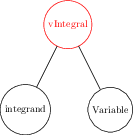

In [48]:
%%tikz -l trees -sc=2


\tikzstyle{every node}=[circle,draw]
\node (Root) [red] {vIntegral}
    child { node {integrand}}
    child { node {Variable}};

In [45]:
class VIntegral(Symbolic):
    def __init__(self, integrand, variable):
        self.integrand = integrand
        self.variable = variable
        self._latex = f'\iiint\limits_{self.variable}({self.integrand})d{self.variable}'   
        
    def latex(self):
        return self._latex 

In [46]:
eq = VIntegral('f','R')
eq.show()

<IPython.core.display.Math object>

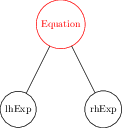

In [20]:
%%tikz -l trees -sc=2

\tikzstyle{every node}=[circle,draw]
\node (Root) [red] {vIntegral}
    child { node {integrand}}
    child { node {differential}};

In [23]:
class Equation(Symbolic):
    def __init__(self, lhExp, rhExp):
        self.lhExp = lhExp
        self.rhExp = rhExp
        
    def latex(self):
        return self.lhExp.latex() + '=' + self.rhExp.latex() 

In [24]:
eq = Equation(VIntegral('f','R'), VIntegral('f','R'))
eq.show()

<IPython.core.display.Math object>

In [25]:
class Constant(Symbolic):
    def __init__(self, constant):
        self.constant = constant
        
    def latex(self):
        return f'{self.constant}'

In [26]:
c = Constant('R')
c.show()

<IPython.core.display.Math object>

In [27]:
class Expression(Symbolic):
    
    def __init__(self, *exps):
        self.exps = list(exps)
        
    def latex(self):
        s = ''
        for e in self.exps:
            s += e.latex() + ' '
        return s
    
    def show(self):
        display(Math(self.latex()))
        

In [121]:
e = Expression([Constant(r'\rho'),Constant('u'),Constant('v')])
e.show()

<IPython.core.display.Math object>

In [122]:
e2 = VIntegral(e,Constant('R'))
e2.show()

<IPython.core.display.Math object>